Import all required libraries

In [ ]:
import numpy as np
import cv2
import pickle
from tensorflow.keras.models import load_model
import keras.utils
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow

In [ ]:
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

False

In [ ]:
model = load_model('/content/drive/MyDrive/Shape_detect/nodel/my_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1*X GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=(1024*4))])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Virtual devices cannot be modified after being initialized


In [ ]:
# import os

# while True:
#     _,img_ = cap.read()
# #     label = ""
# #     img = np.asarray(img_)
# #     img = cv2.resize(img, (200, 200))
# #     img = preprocessing(img)
# #     cv2.imshow("Processed Image", img)
# #     img = img.reshape(1, 200, 200, 1)
# #     cv2.putText(img_, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
# #     cv2.putText(img_, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    
# #     # PREDICT IMAGE
# #     pred = model.predict(img)
# # #     classIndex = np.round(pred).astype(int)
# #     classNo = np.argmax(pred,axis=1)
# #     probabilityValue =np.amax(pred)
    
# #     if   classNo[0] == 0: label ='Circle'
# #     elif classNo[0] == 1: label ='Square'
# #     elif classNo[0] == 2: label ='Star'
# #     elif classNo[0] == 3: label ='Triangle'
 
# #     if probabilityValue > threshold:
# # #         print(classNo)
# #         cv2.putText(img_,str(label), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
# #         cv2.putText(img_, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
#         # cv2.imshow("Result", img_)
#     cv2_imshow(img_)
#     # cv2.imshow("Result", img)
#     if cv2.waitKey(1) and 0xFF == ord('q'):
#         break

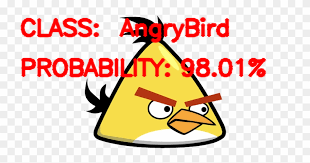

'\nJust by changing the label name in the code you can turn it into object detection by taking objects that are shapes that we have trained our model to detect.\n\n'

In [ ]:
import os

img_ = cv2.imread('/content/drive/MyDrive/Shape_detect/angry_bird.png')
label = ""
img = np.asarray(img_)
img = cv2.resize(img, (200, 200))
img = preprocessing(img)
# cv2.imshow("Processed Image", img)
img = img.reshape(1, 200, 200, 1)
cv2.putText(img_, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
cv2.putText(img_, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

pred = model.predict(img)
#     classIndex = np.round(pred).astype(int)
classNo = np.argmax(pred,axis=1)
probabilityValue =np.amax(pred)

if   classNo[0] == 0: label ='Circle'
elif classNo[0] == 1: label ='Square'
elif classNo[0] == 2: label ='Star'
elif classNo[0] == 3: label ='AngryBird'

if probabilityValue > threshold:
#         print(classNo)
    cv2.putText(img_,str(label), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(img_, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

cv2_imshow(img_)

"""
Just by changing the label name in the code you can turn it into object detection by taking objects that are shapes that we have trained our model to detect.

"""

In [ ]:
cap = cv2.VideoCapture(0)
while True:
  _,img = cap.read()
  
  cv2_imshow(img)
  cv2.waitkey(0)
  cv2.destroyAllWindows()